# Eigenmode

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi,sqrt,exp,cos,sin,array
from numpy.linalg import inv
from lib.Model import *
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 13,
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsfonts}",
    "lines.linewidth": 1
})

In [1]:
np

NameError: name 'np' is not defined

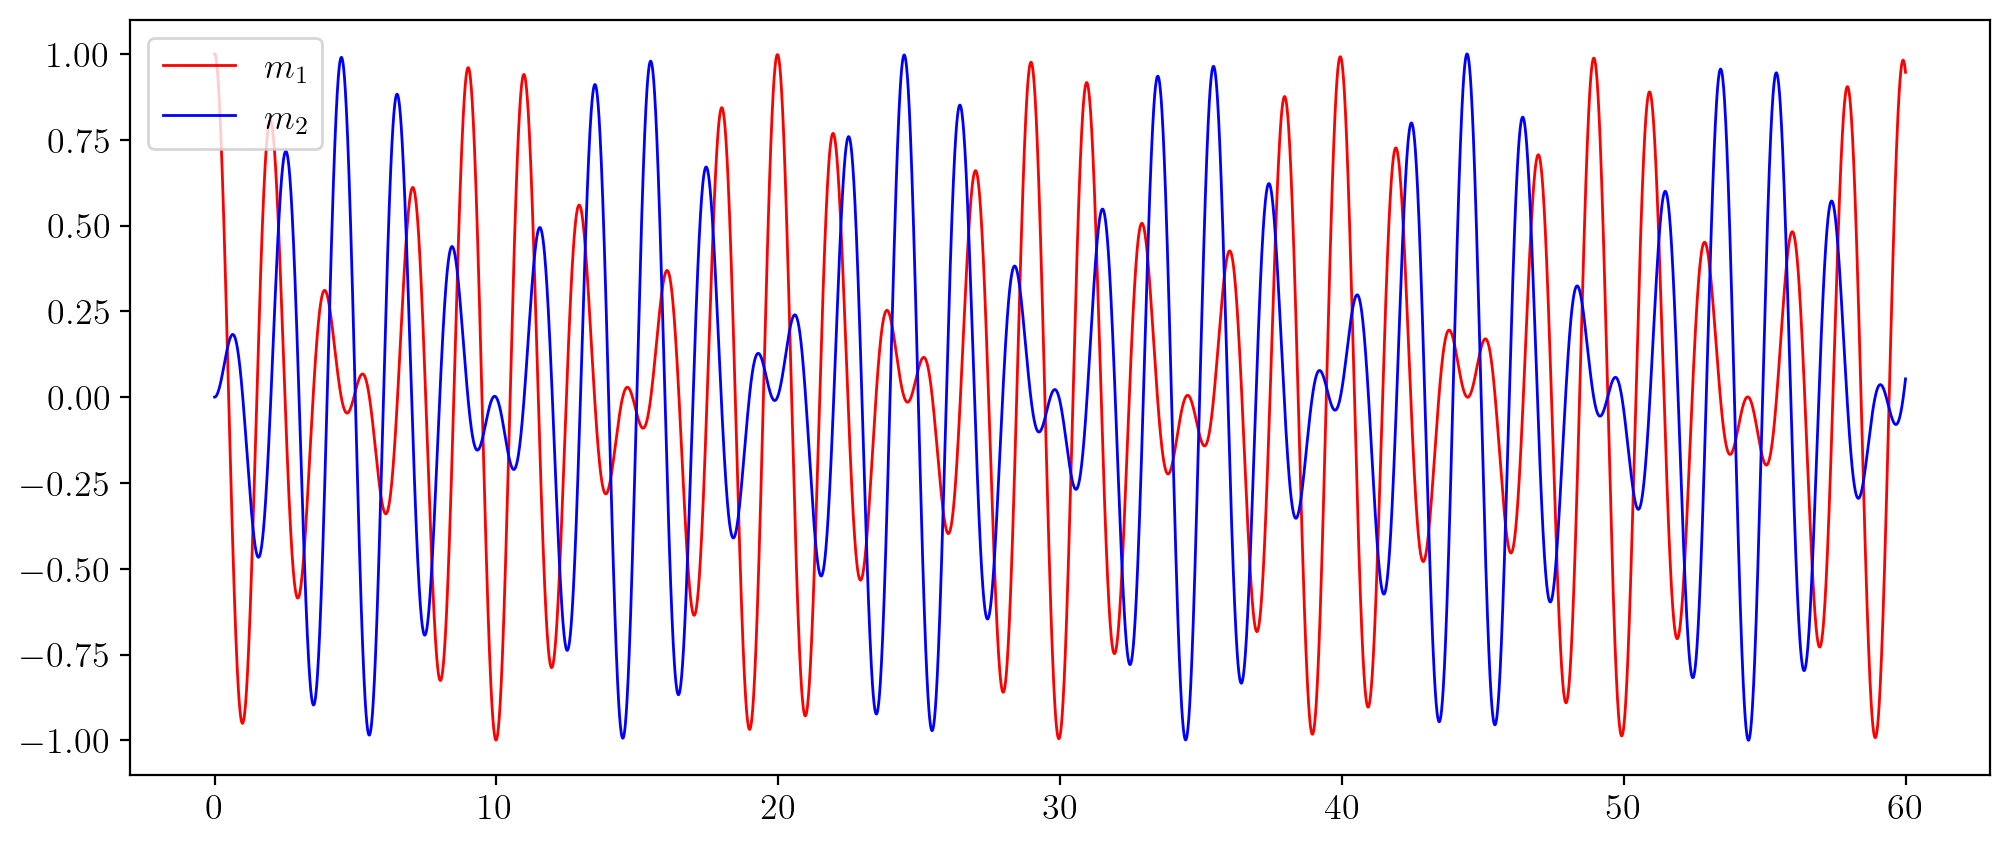

In [18]:
dt = 0.01
t_end=60
(k1, k2, k3) = (4.0, 1.0, 4.0)
(m1, m2) = (0.5, 0.5)
(x1_i,x2_i) = (1,0)

(t, x1,x2,v1,v2) = Model(k=(k1, k2, k3),m=(m1, m2),dt=dt,t_end=t_end,x1_i=x1_i,x2_i=x2_i,v1_i=0,v2_i=0)

plt.figure(figsize=(12,5),dpi=200)
plt.plot(t,x1,color='red',label='$m_1$')
plt.plot(t,x2,color='blue',label='$m_2$')
plt.legend()
plt.show()

Eigenmode
- Eigenvalues $\lambda$
$$
\begin{equation}
\lambda_1,\lambda_2 = \frac{\mathrm{tr}(\mathcal{F}) \pm \sqrt{\mathrm{tr}(\mathcal{F})^2-4\det({\mathcal{F}})}}{2},
\end{equation}
$$
where
$$
\begin{aligned}
\mathrm{tr}(\mathcal{F}) &=-\frac{m_2k_1+\left(m_1+m_2\right)k_2+m_1k_3}{m_1m_2}
\\
\det(\mathcal{F}) &=\frac{k_1k_2+k_2k_3+k_3k_1}{m_1m_2},
\end{aligned}
$$
- Eigenfrequencies $\omega$
$$
\omega_i^2 = -\lambda_i,\quad i=1,2 
$$

- Eigenvectors $\mu$
$$
\mu_i \propto \begin{pmatrix}
\displaystyle  m_2 \lambda_i+ \left(k_2+k_3\right)\\
\displaystyle  k_2
\end{pmatrix},\quad i=1,2
$$
- Linear expansion
$$
\psi\left(t\right) = C_1e^{i\omega_1 t}\mu_1+C_2e^{i\omega_2 t}\mu_2
$$
- initial value
$$
\begin{pmatrix}C_1\\C_2\end{pmatrix} =  \begin{pmatrix}\mu_1&\mu_2\end{pmatrix}^{-1}
\begin{pmatrix}x_1\left(0\right)\\x_2\left(0\right)\end{pmatrix}
= M^{-1}\begin{pmatrix}x_1\left(0\right)\\x_2\left(0\right)\end{pmatrix}
$$

In [19]:
trF  = -(m2*k1 + (m1+m2)*k2 + m1*k3)/(m1*m2)
detF =  (k1*k2 + k2*k3 + k3*k1)/(m1*m2)
lda1 = (trF +sqrt(trF*trF-4*detF))/2
lda2 = (trF -sqrt(trF*trF-4*detF))/2
omega1 = sqrt(-lda1)
omega2 = sqrt(-lda2)
mu1 = array([[m2*lda1+(k2+k3)], [k2]])
mu2 = array([[m2*lda2+(k2+k3)], [k2]])
M = np.hstack([mu1,mu2])
invM = inv(M)
C = invM@array([[x1_i],[x2_i]])
C1 = C[0][0]
C2 = C[1][0]
psi = C1*cos(omega1*t)*mu1 + C2*cos(omega2*t)*mu2
psi1 = psi[0]
psi2 = psi[1]


print("lambda1 =", lda1)
print("lambda2 =", lda2)
print("omega1 =" , omega1)
print("omega2 =" , omega2)
print("mu1 =\n" , mu1)
print("mu2 =\n" , mu2)
print("M =\n" , M)
print("invM =\n" , invM)
print("C1 =" , C1)
print("C2 =" , C2)

lambda1 = -8.0
lambda2 = -12.0
omega1 = 2.8284271247461903
omega2 = 3.4641016151377544
mu1 =
 [[1.]
 [1.]]
mu2 =
 [[-1.]
 [ 1.]]
M =
 [[ 1. -1.]
 [ 1.  1.]]
invM =
 [[ 0.5  0.5]
 [-0.5  0.5]]
C1 = 0.5
C2 = -0.5


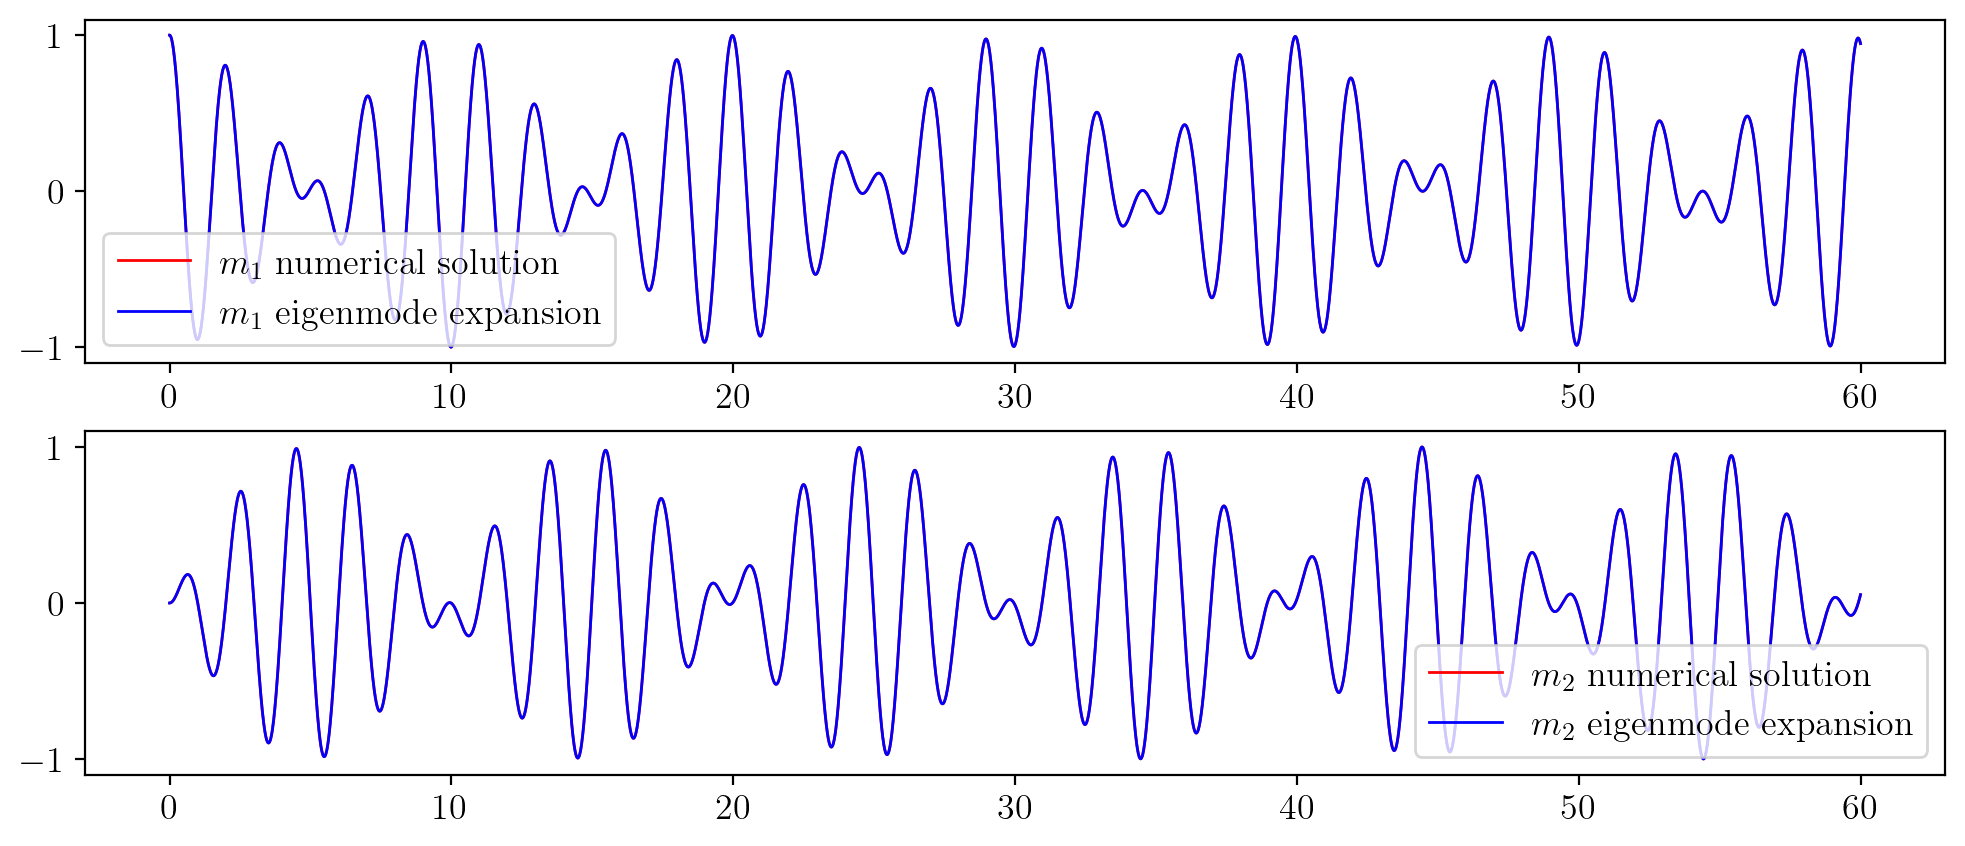

In [20]:
fig = plt.figure(figsize=(12,5),dpi=200)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(t,x1,color='red',label='$m_1$ numerical solution')
ax1.plot(t,psi1,color='blue',label='$m_1$ eigenmode expansion')

ax2.plot(t,x2,color='red',label='$m_2$ numerical solution')
ax2.plot(t,psi2,color='blue',label='$m_2$ eigenmode expansion')

ax1.legend()
ax2.legend()
plt.show()

## Comparison

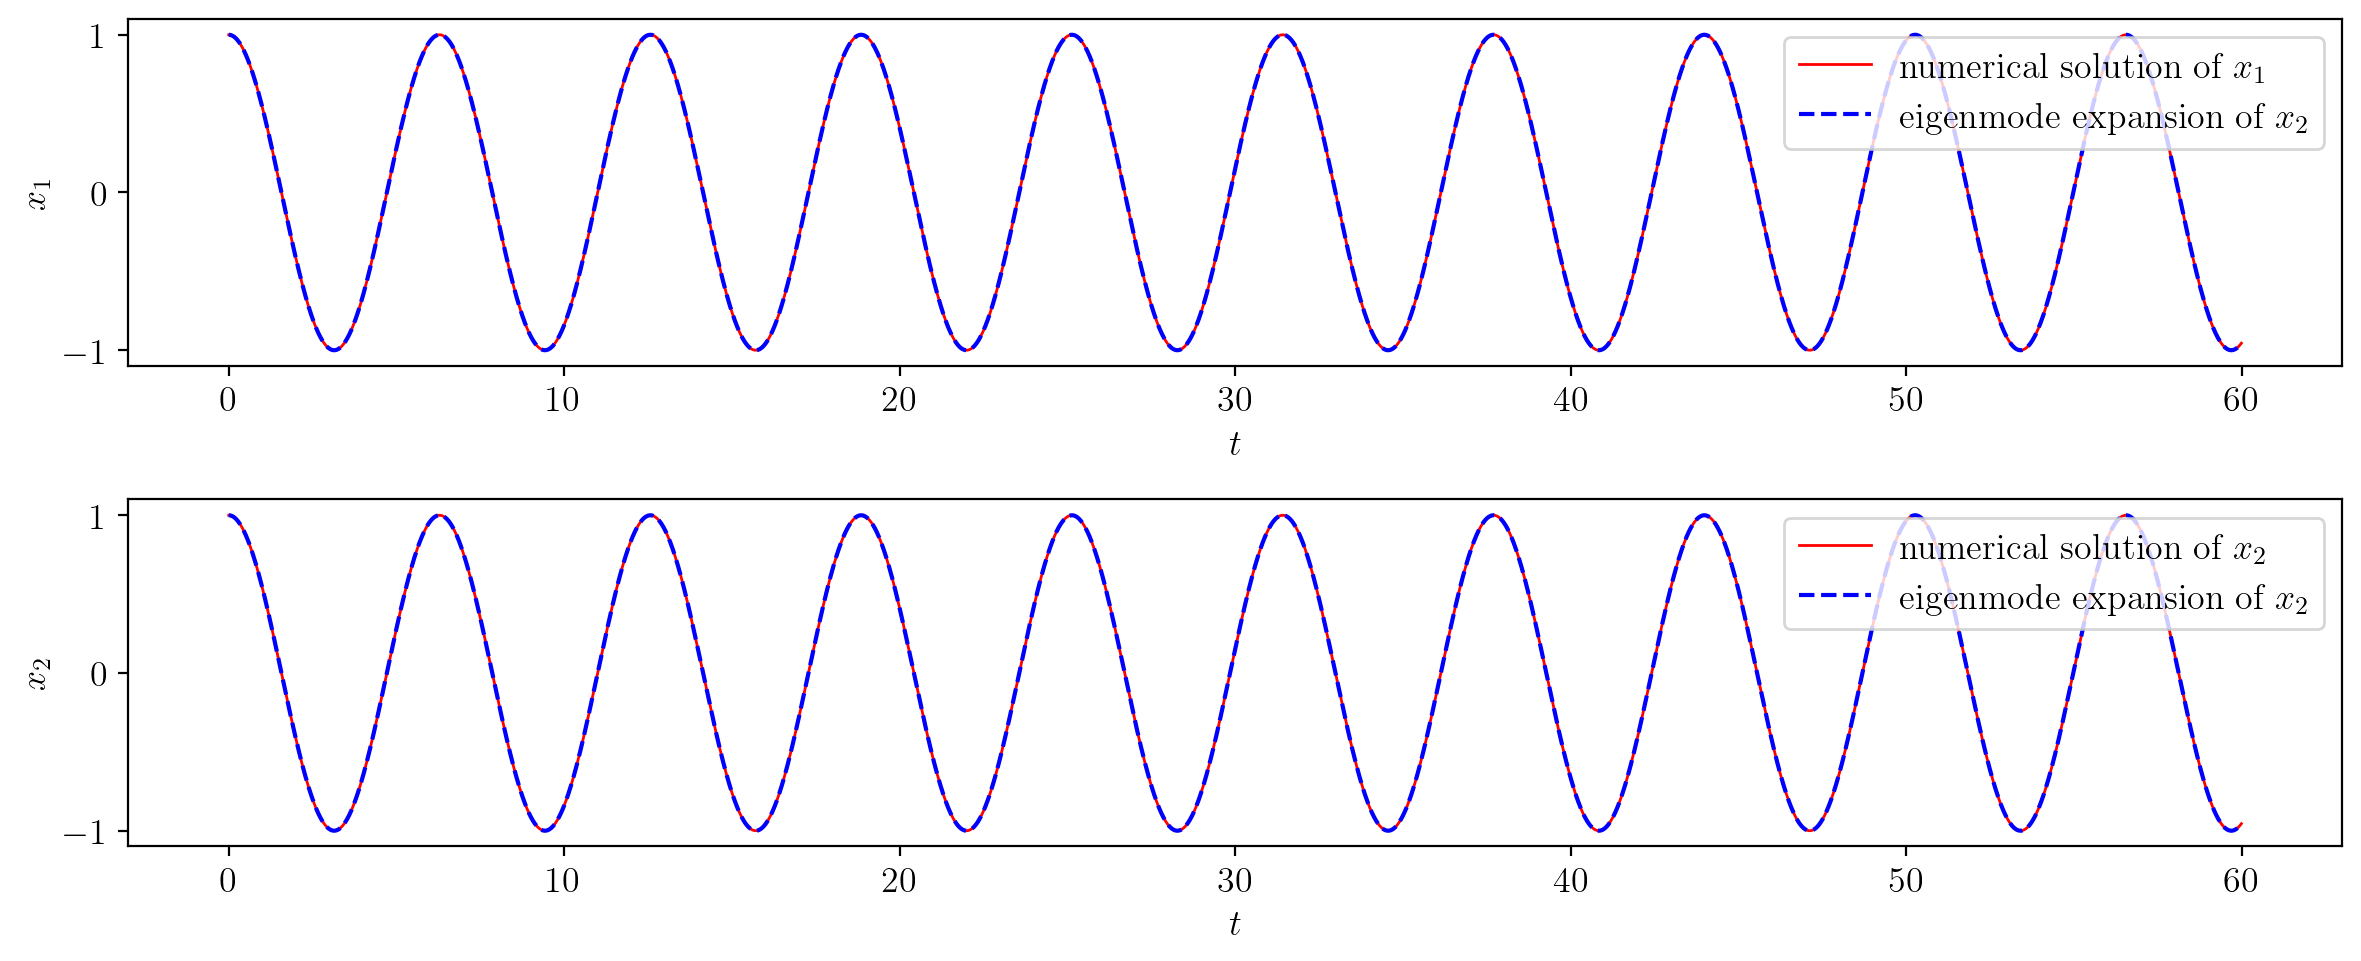

In [22]:
dt = 0.01
t_end=60
(k1, k2, k3) = (1.0, 1.0, 1.0)
(m1, m2) = (1.0, 1.0)
(x1_i,x2_i) = (1,1)

# numerical solution
(t, x1,x2,v1,v2) = Model(k=(k1, k2, k3),m=(m1, m2),dt=dt,t_end=t_end,x1_i=x1_i,x2_i=x2_i,v1_i=0,v2_i=0)
# Eigenmode expansion
trF  = -(m2*k1 + (m1+m2)*k2 + m1*k3)/(m1*m2)
detF =  (k1*k2 + k2*k3 + k3*k1)/(m1*m2)
(lda1,lda2) = ((trF +sqrt(trF*trF-4*detF))/2, (trF -sqrt(trF*trF-4*detF))/2)
(omega1,omega2) = (sqrt(-lda1),sqrt(-lda2)) 
(mu1,mu2) = (array([[m2*lda1+(k2+k3)], [k2]]),array([[m2*lda2+(k2+k3)], [k2]]))
M = np.hstack([mu1,mu2])
invM = inv(M)
C = invM@array([[x1_i],[x2_i]])
(C1,C2) = (C[0][0],C[1][0])
psi = C1*cos(omega1*t)*mu1 + C2*cos(omega2*t)*mu2
(psi1,psi2) = (psi[0],psi[1])

step1 = 30
# --- plot -----------------------------------------------------------------------------
fig = plt.figure(figsize=(12,5),dpi=200)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
marker1 = '-'
marker2 = '--'
zorder1 = 1
zorder2 = 2
linewidth1 = 1
linewidth2 = 1.5
ax1.plot(t,x1,marker1   ,color='red',  label='numerical solution of $x_1$',  linewidth=linewidth1,zorder=zorder1)
ax1.plot(t,psi1,marker2 ,color='blue', label='eigenmode expansion of $x_2$', linewidth=linewidth2,zorder=zorder2)

ax2.plot(t,x2,marker1   ,color='red',  label='numerical solution of $x_2$',  linewidth=linewidth1,zorder=zorder1)
ax2.plot(t,psi2,marker2 ,color='blue', label='eigenmode expansion of $x_2$', linewidth=linewidth2,zorder=zorder2)

[[[ax1,ax2][i].set_xlabel("$t$"),[ax1,ax2][i].set_ylabel(f"$x_{i+1}$")] for i in [0,1]]
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
fig.tight_layout()
plt.show()